In [27]:
%load_ext autoreload
%autoreload 2
from wbfm.utils.projects.finished_project_data import ProjectData
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [126]:
# fname = "/scratch/zimmer/Charles/dlc_stacks/project-pytest/project_config.yaml"
# fname = "/scratch/zimmer/Charles/dlc_stacks/worm3-2021_09_29/project_config.yaml"
fname = "/scratch/zimmer/Charles/dlc_stacks/worm3-multiple_templates/project_config.yaml"

# fname = "/scratch/zimmer/Charles/dlc_stacks/worm3-leifer_template/project_config.yaml"
dat = ProjectData.load_final_project_data_from_config(fname)

Project data for directory:
/scratch/zimmer/Charles/dlc_stacks/worm3-multiple_templates 
Found the following raw data files:
red_data: True
green_data: True
============Segmentation===============
raw_segmentation: True
segmentation: True
============Tracklets==================
df_training_tracklets: True
reindexed_masks_training: True
============Traces=====================
red_traces: True
green_traces: True
final_tracks: True
behavior_annotations: True



In [127]:
matches = dat.raw_matches


/home/charles/anaconda3/envs/segmentation/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator GaussianProcessRegressor from version 1.0 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [128]:
# pair = (63, 64)
# pair = (740, 741)
pair = (50, 51)
# pair = (0,1)

m = matches[pair]

In [129]:
import numpy as np
np.set_printoptions(precision=2)

for f in m.final_matches:
    zxy0, zxy1 = m.frame0.neuron_locs[f[0]], m.frame1.neuron_locs[f[1]]
    dz = zxy1[0] - zxy0[0]
    if np.abs(dz) > 2:
        print(zxy0, zxy1, dz)

[ 10.12 349.35 377.14] [ 12.63 224.82 237.45] 2.514853063717011
[ 11.25 314.3  648.07] [  8.15 275.85 704.9 ] -3.0939469099108337
[ 13.84 248.7  546.26] [ 11.15 237.45 591.61] -2.683635999538547
[ 17.82 306.17 559.28] [ 20.18 285.11 617.34] 2.3642270351008214
[ 19.08 403.11 354.75] [ 21.1  286.29 205.53] 2.016483056756382
[ 24.48 264.03 494.25] [ 26.72 273.21 541.87] 2.240189613622519
[ 26.03 243.86 341.34] [ 22.78 309.98 382.84] -3.241670663895256
[ 25.66  40.45 210.81] [ 23.37  41.21 139.26] -2.295045245135988
[ 25.66  67.74 221.15] [ 23.48  58.75 145.18] -2.178441392855511
[ 25.88 278.23 419.91] [ 23.63 309.96 471.19] -2.248983522030162
[ 22.63 292.52 675.45] [ 20.28 274.45 723.21] -2.35103010768562
[ 24.8  281.16 535.12] [ 22.01 275.28 582.58] -2.7890319658063447


In [131]:
df2 = dat.df_all_tracklets

In [132]:
# Redo the pytest test
df_delta = df2.diff()[1:]
all_neurons = list(df2.columns.levels[0])
max_z_delta = 2

for n in all_neurons:
    z_delta_series = df_delta[n]['z']
#     print(np.logical_or(np.abs(z_delta_series <= max_z_delta), np.isnan(z_delta_series)))
#     print(z_delta_series)

In [133]:
df_fdnc = dat.df_fdnc_tracklets
df_final = dat.final_tracks
df_tracklets = dat.df_all_tracklets

In [145]:
which_neuron = 'neuron_003'
which_time = [50, 51, 52, 53]

In [146]:
df_fdnc[which_neuron].iloc[which_time]


,z,x,y,likelihood
50,8.723077,273.434188,491.977778,0.348506
51,7.545190,294.881438,508.822157,0.153086
52,4.254405,279.926211,484.392070,0.217261
53,7.783784,274.266003,492.874822,0.600524


In [147]:
df_final[which_neuron].iloc[which_time]

,z,x,y,likelihood
50,8.723077,273.434188,491.977778,0.348506
51,7.545190,294.881438,508.822157,0.153086
52,4.254405,279.926211,484.392070,0.217261
53,7.783784,274.266003,492.874822,0.600524


In [150]:
all_neurons = list(df_tracklets.columns.levels[0])
all_candidates = []
from tqdm.auto import tqdm
for n in tqdm(all_neurons):
    zxy = df_tracklets[n].iloc[which_time]
    z = zxy['z'].iloc[0]
    if not np.isnan(z) and np.abs(z - 8.7) < 0.1:
        print(n, zxy)
        all_candidates.append(n)

  0%|          | 0/12176 [00:00<?, ?it/s]

neuron768 coords         z           x           y  likelihood
50      8.723077  273.434188  491.977778    0.779165
51      8.083205  283.697997  554.053929    0.729823
52      7.258250  277.946915  518.812052    0.894873
53      7.274457  271.711957  476.620924    0.672661


In [151]:
tracklet_name = all_candidates[0]

t = df_tracklets[tracklet_name]
print(t[~np.isnan(t['z'])])

coords         z           x           y  likelihood
46      7.856369  317.308943  443.261518    0.697491
47      8.979969  304.468413  446.716487    0.840365
48      8.432739  302.870340  458.583468    0.813983
49      9.151468  280.281298  461.562597    0.868567
50      8.723077  273.434188  491.977778    0.779165
..           ...         ...         ...         ...
111     8.869182  252.914465  408.079245    0.855718
112     8.384045  246.612245  393.235622    0.835571
113     8.300149  237.925706  393.745914    0.401518
114     8.173913  248.806763  427.852657    0.855736
115     7.698697  244.213355  441.174267    0.000000

[70 rows x 4 columns]


In [152]:
t.iloc[which_time]

coords,z,x,y,likelihood
50,8.723077,273.434188,491.977778,0.779165
51,8.083205,283.697997,554.053929,0.729823
52,7.258250,277.946915,518.812052,0.894873
53,7.274457,271.711957,476.620924,0.672661


<AxesSubplot:>

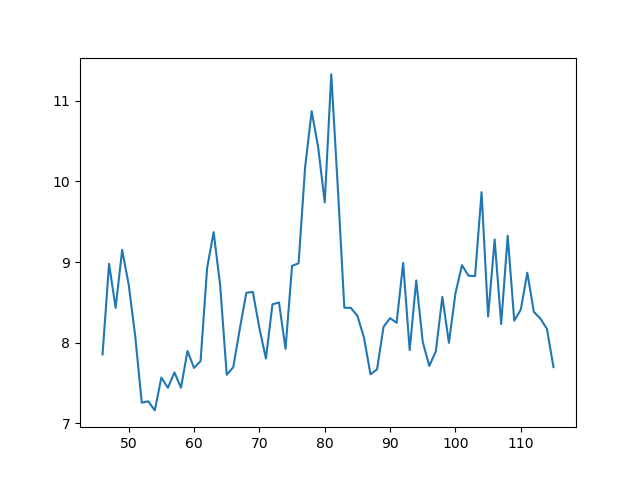

In [155]:
%matplotlib widget
t[~np.isnan(t['z'])]['z'].plot()

<AxesSubplot:>

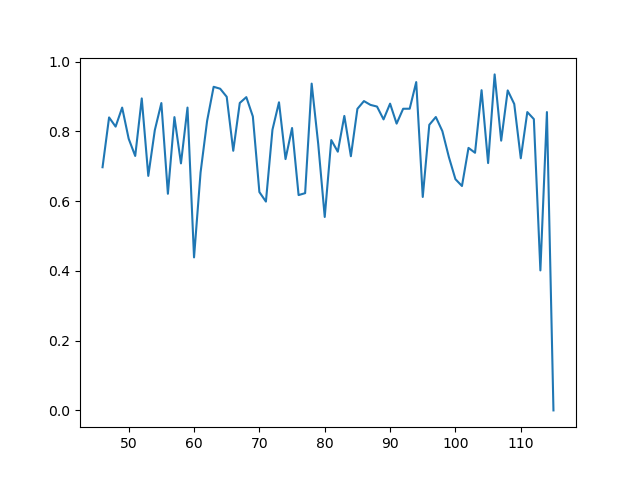

In [156]:
%matplotlib widget
t[~np.isnan(t['z'])]['likelihood'].plot()

<AxesSubplot:>

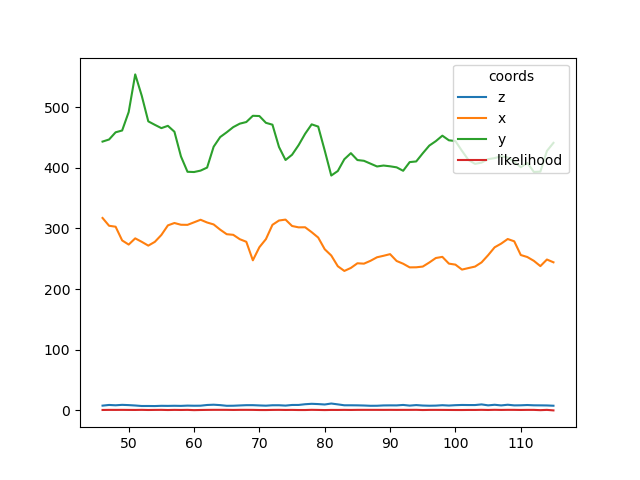

In [170]:
%matplotlib widget
t.plot()

# Look at reindexing

In [160]:
from wbfm.utils.projects.utils_filepaths import ModularProjectConfig, ConfigFileWithProjectContext, \
    pickle_load_binary

In [161]:
import os
fname = os.path.join('4-traces', 'all_matches.pickle')
fname = os.path.join(dat.project_config.project_dir, fname)
reindexing_matches = pickle_load_binary(fname)

In [166]:
reindexing_matches[1]

array([[ 87., 135.,   1.],
       [ 88., 190.,   1.],
       [119., 130.,   1.],
       [120., 112.,   1.],
       [111., 188.,   1.],
       [112., 146.,   1.],
       [ 81.,  30.,   1.],
       [ 82.,   5.,   1.],
       [101., 171.,   1.],
       [102., 192.,   1.],
       [105.,  49.,   1.],
       [106.,  92.,   1.],
       [  4., 124.,   1.],
       [  5.,  18.,   1.],
       [  6.,   1.,   1.],
       [ 83.,  48.,   1.],
       [ 84.,  59.,   1.],
       [ 31.,  14.,   1.],
       [ 32.,  26.,   1.],
       [ 27., 136.,   1.],
       [ 28., 141.,   1.],
       [ 13.,  84.,   1.],
       [ 14.,  70.,   1.],
       [ 15., 185.,   1.],
       [ 79., 123.,   1.],
       [ 80.,   6.,   1.],
       [ 77., 170.,   1.],
       [ 78., 175.,   1.],
       [ 33.,   7.,   1.],
       [ 34.,  32.,   1.],
       [ 75., 143.,   1.],
       [ 76., 142.,   1.],
       [  7., 145.,   1.],
       [  8., 114.,   1.],
       [  9., 116.,   1.],
       [113., 168.,   1.],
       [114.,  23.,   1.],
 

(array([  0.,   0.,   0.,   0.,   0., 120.,   0.,   0.,   0.,   0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

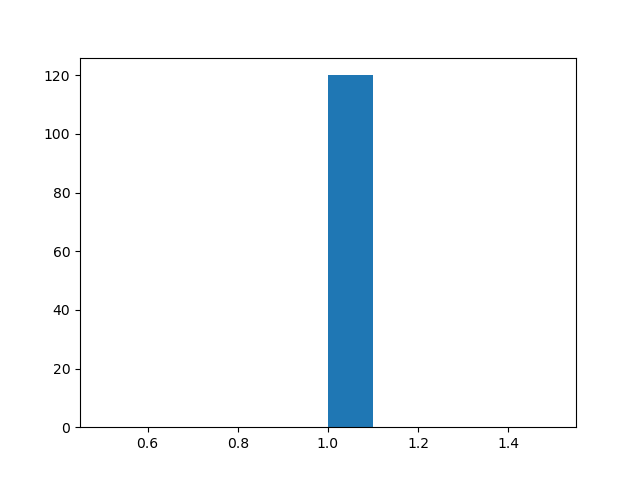

In [165]:
rm = reindexing_matches[4]
%matplotlib widget
plt.hist(rm[:, 2])

In [120]:
from wbfm.utils.visualization.utils_segmentation import all_matches_to_lookup_tables

In [121]:
all_lut = all_matches_to_lookup_tables(reindexing_matches)

In [125]:
all_lut[0][172]

151